<a href="https://colab.research.google.com/github/EyberRosero/Modelado-y-Simulacion-/blob/master/Trabajo_Final(Sistema%20caotico%20memristivo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diferentes familias de atractores extraños en un sistema caótico memristivo de 4D**


El artículo toma como referencia las observaciones de Chua, de la interesante relación entre elementos (tierra, agua, aire y fuego) y las variables de los circuitos (voltaje, corriente, flujomagnético y carga) para a partir de estos plantear una modelo de un **Memristor**

Se plantea la expresion matematica para describir al memristor la cual se define de la siguiente manera:


\begin{equation}
 y=g(x,u,t)u,
\end{equation} 
\begin{equation}
 \dot{x}=f(x,u,t),
\end{equation} 

donde $x$ es una variable de estado, $u$ es la entrada y la salida del sistema es definida
por $y$, $f$ es una función continua n-dimensional y $g$ es una función continua.

##Sistema caótico de 4 dimensiones basado en un memristor

Introducen el modelo del memristor presentado anteriormente a un sistema dinámico el cual invirte el campo geomagnético de la tierra.

El modelo matematico del sistema caotico basado en el memristor es descrito de la siguiente forma:

\begin{equation}
 \dot{x}=ax-yz,
\end{equation} 
\begin{equation}
 \dot{y}=-by+xz,
\end{equation} 
\begin{equation}
 \dot{z}=-z+xy-(\alpha+\gamma w^{2}),
\end{equation} 
\begin{equation}
 \dot{w}=kz,
\end{equation} 

donde $x,y,z,w$ son variables de estado, y $a,b,k$ son parámetros reales.

Con el objetivo de encontrar una solucion numerica, se fijan los siguientes parametros del sistema:
- $a=0.12$
- $b=0.1$
- $k=-0.1$
- $\alpha=-0.15$
- $\gamma=-0.3$

y las condiciones iniciales $(1, 0.1, 0.1, 0)$ 

Módulos de librerias

In [454]:
import matplotlib.style
matplotlib.style.use('classic')
import numpy as np
from time import time
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import axes3d
from textwrap import wrap
from sympy import var,nonlinsolve,Matrix,det,solve,simplify,factor

Se define la funcion que representa el modelo del sistema caotico basado en el memristor

In [ ]:
def atr_oculto(t,xyzw,a,b,k,alp,rho):
    x,y,z,w = xyzw
    return [(a*x)-(y*z),(-b*y)+(x*z),(-z)+(x*y)-(alp+(rho*(w**2))),k*z]

Se definen condiciones iniciales y los parametros del sistema

In [ ]:
time = [0,2000]
t = np.arange(300,2000,0.001)
init_condi = [1,0.1,0.1,0]
solucion = solve_ivp(atr_oculto,time,init_condi,method='RK45',args=[0.12,0.1,-0.1,-0.15,-0.3],t_eval=t)
t = solucion.t
x = solucion.y[0,:]
y = solucion.y[1,:]
z = solucion.y[2,:]
w = solucion.y[3,:]

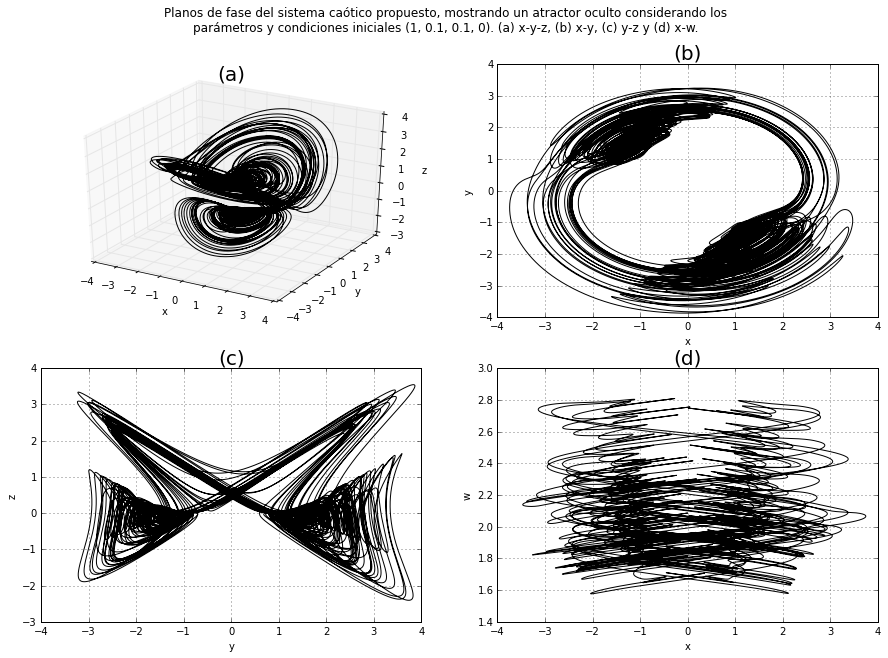

In [ ]:
fig = plt.figure(figsize=(15,10))
fig.suptitle("\n".join(wrap('Planos de fase del sistema caótico propuesto, mostrando un atractor oculto considerando los parámetros y condiciones iniciales (1, 0.1, 0.1, 0). (a) x-y-z, (b) x-y, (c) y-z y (d) x-w.',100)),fontsize=12)

ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot3D(x,y,z,c='k')
ax.set_title('(a)',fontsize=20)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax = fig.add_subplot(2, 2, 2)
ax.plot(-x,-y,c='k')
ax.grid(True)
ax.set_title('(b)',fontsize=20)
ax.set_ylabel('y')
ax.set_xlabel('x')

ax = fig.add_subplot(2, 2, 3)
ax.plot(y,z,c='k')
ax.grid(True)
ax.set_title('(c)',fontsize=20)
ax.set_ylabel('z')
ax.set_xlabel('y')

ax = fig.add_subplot(2, 2, 4)
ax.plot(x,w,c='k')
ax.grid(True)
ax.set_title('(d)',fontsize=20)
ax.set_ylabel('w')
ax.set_xlabel('x')

plt.show()

## Coexistencia de atractores

La coexistencia de atractores aparece cuando
diferentes valores de condiciones iniciales son considerados bajo el mismo
conjunto de parámetros y pueden generar atractores diferentes.

Para este caso se consideran los siguientes parámetros:

- $a=0.12$
- $b=0.1$
- $k=-0.1$
- $\alpha=-0.15$
- $\gamma=0.25$

y las condiciones iniciales $(0.1, 0.1, 0.1, 0)$ y $(1, 0.1, 0.1, 0)$ 

Se definen las primeras condiciones iniciales $(0.1, 0.1, 0.1, 0)$ y parametros del sistema

In [ ]:
time = [0,6000]
t = np.arange(4000,6000,0.001)
init_condi1 = [0.1,0.1,0.1,0]
solucion1 = solve_ivp(atr_oculto,time,init_condi1,method='RK45',args=[0.12,0.1,-0.1,-0.15,0.25],t_eval=t)
t = solucion1.t
x1 = solucion1.y[0,:]
y1 = solucion1.y[1,:]
z1 = solucion1.y[2,:]
w1 = solucion1.y[3,:]

Se definen las segundas condiciones iniciales $(1, 0.1, 0.1, 0)$ y parametros del sistema

In [ ]:
time = [0,6000]
t = np.arange(4000,6000,0.001)
init_condi2 = [1,0.1,0.1,0]
solucion2 = solve_ivp(atr_oculto,time,init_condi2,method='RK45',args=[0.12,0.1,-0.1,-0.15,0.25],t_eval=t)
t = solucion2.t
x2 = solucion2.y[0,:]
y2 = solucion2.y[1,:]
z2 = solucion2.y[2,:]
w2 = solucion2.y[3,:]

A continuación se grafican los atractores coexistentes autoexcitados con condiciones iniciales diferentes

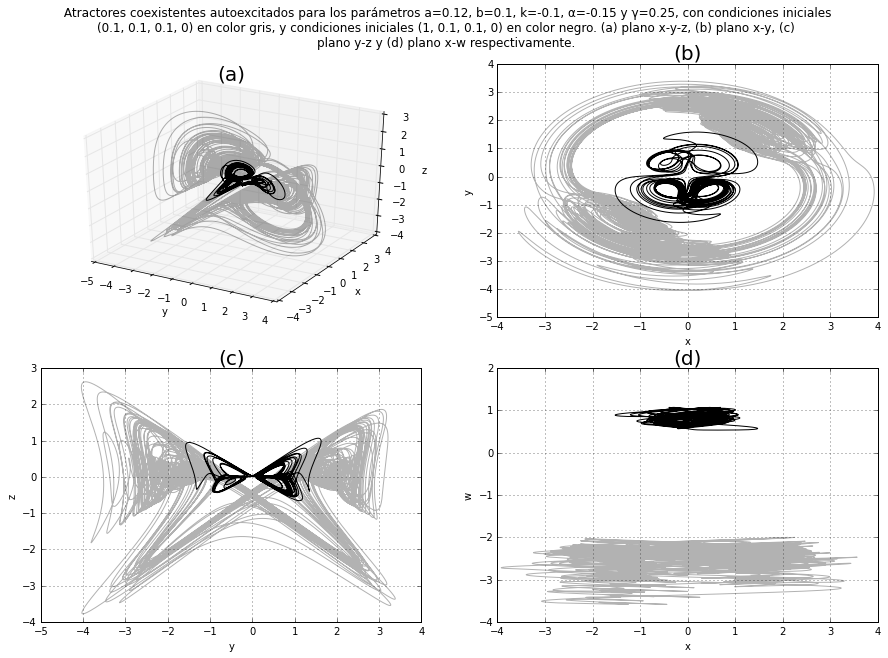

In [ ]:
fig = plt.figure(figsize=(15,10))
fig.suptitle("\n".join(wrap(' Atractores coexistentes autoexcitados para los parámetros a=0.12, b=0.1, k=-0.1, α=-0.15 y γ=0.25, con condiciones iniciales (0.1, 0.1, 0.1, 0) en color gris, y condiciones iniciales (1, 0.1, 0.1, 0) en color negro. (a) plano x-y-z, (b) plano x-y, (c) plano y-z y (d) plano x-w respectivamente.',130)),fontsize=12)

ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot3D(-y1,x1,z1,c='k',alpha=0.3)
ax.plot3D(-y2,x2,z2,c='k')
ax.set_title('(a)',fontsize=20)
ax.set_xlabel('y')
ax.set_ylabel('x')
ax.set_zlabel('z')


ax = fig.add_subplot(2, 2, 2)
ax.plot(-x1,-y1,c='k',alpha=0.3)
ax.plot(x2,-y2,c='k')
ax.grid(True)
ax.set_title('(b)',fontsize=20)
ax.set_ylabel('y')
ax.set_xlabel('x')

ax = fig.add_subplot(2, 2, 3)
ax.plot(y2,-z2,c='k')
ax.plot(-y1,z1,c='k',alpha=0.3)
ax.grid(True)
ax.set_title('(c)',fontsize=20)
ax.set_ylabel('z')
ax.set_xlabel('y')

ax = fig.add_subplot(2, 2, 4)
ax.plot(x1,w1,c='k',alpha=0.3)
ax.plot(x2,w2,c='k')
ax.grid(True)
ax.set_title('(d)',fontsize=20)
ax.set_ylabel('w')
ax.set_xlabel('x')
#ax.set_ylim([1.5,3])

plt.show()

Además se realiza el diagrama de bifurcación del sistema variando la condicion iniciale de $x(0)$ y fijando los demás de acuerdo con $(x,y,z,)=(x(0),0.1,0.1,0)$

In [ ]:
def event_atr(t,xyzw,a,b,k,alp,rho):
    x,y,z,w = xyzw
    return x

In [ ]:
event_atr.direction = -1
time = [0,1000]

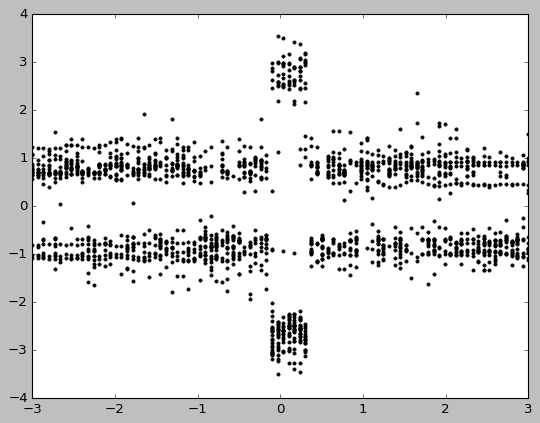

In [ ]:
rs = np.linspace(-3,3,90)
for r in rs:
  solucion = solve_ivp(atr_oculto,time,[r,0.1,0.1,0],events=[event_atr],args=[0.12,0.1,-0.1,-0.15,0.25])
  for i in range(len(solucion.t_events[0])):
    if solucion.t_events[0][i]>40:
      plt.plot(r,solucion.y_events[0][i,1],'.k')

A partir del diagrama de bifurcación mostrado anteriormente, se observa que
al considerar diferentes valores de condiciones iniciales, surgen dos regiones de bifurcación, una definida en (-0.11,0.3) y la otra definida en (-3,-0.11)∪(0.3,3) como consecuencia, dos atractores diferentes pueden ser observados. 

## Diagramas de Bifurcacion para los parámetros $b$ y $k$

Esto con la finalidad de investigar el comportamiento dinámico del sistema caótico
basado en un memristor

In [ ]:
def event_atr(t,xyzw,a,b,k,alp,rho):
    x,y,z,w = xyzw
    return x

In [ ]:
event_atr.direction = -1
time = [0,5000]
init_condi = [0.1,0.1,0.1,0]

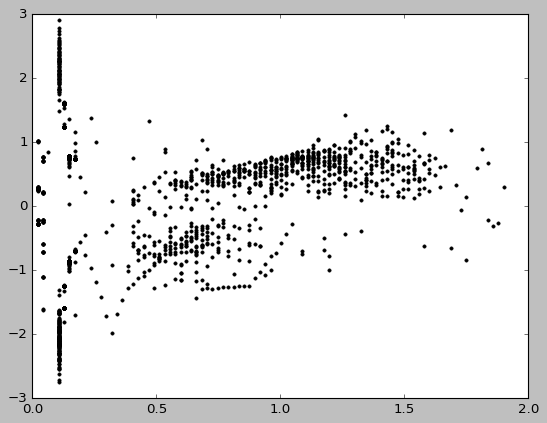

In [ ]:
rs = np.linspace(0,1.9,90)
for r in rs:
  solucion = solve_ivp(atr_oculto,time,init_condi,events=[event_atr],args=[0.12,r,-0.1,-0.15,0.25])
  for i in range(len(solucion.t_events[0])):
    if solucion.t_events[0][i]>20:
      plt.plot(r,solucion.y_events[0][i,1],'.k')
  #init_condi = solucion.y[:,-1]

In [ ]:
event_atr.direction = -1
time = [0,5000]
init_condi = [0.1,0.1,0.1,0]

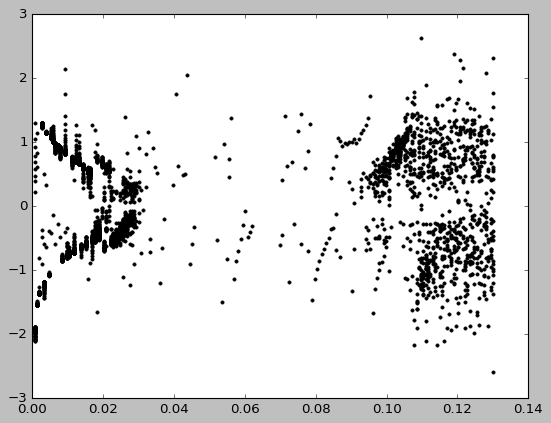

In [ ]:
rs = np.linspace(0,0.13,200)
for r in rs:
  solucion = solve_ivp(atr_oculto,time,init_condi,events=[event_atr],args=[0.12,1,r,-0.15,0.25])
  for i,t_ in enumerate(solucion.t_events[0]):
    if solucion.t_events[0][i]>40:
      plt.plot(r,solucion.y_events[0][i,1],'.k')

Esto confirma una diversidad en los
atractores autoexcitados generados 

A continuación, con ayuda de los diagramas de bifurcación, se definen
los siguientes conjuntos de parámetros $a=0.12, b=1, k=0.1, \alpha=-0.15 y \gamma=0.25$ 
y condiciones iniciales $(1, 0.1, 0.1,$ 0) respectivamente, entonces se muestran las proyecciones en
los diferentes planos de un atractor autoexcitado con cuatro enrollamientos. 

In [ ]:
time = [0,6000]
t = np.arange(1000,6000,0.001)
init_condi = [1,0.1,0.1,0]
solucion = solve_ivp(atr_oculto,time,init_condi,method='RK45',args=[0.12,1,0.1,-0.15,0.25],t_eval=t)
t = solucion.t
x = solucion.y[0,:]
y = solucion.y[1,:]
z = solucion.y[2,:]
w = solucion.y[3,:]

Se grafican los diferentes planos de un atractor autoexcitado con cuatro enrollamientos.

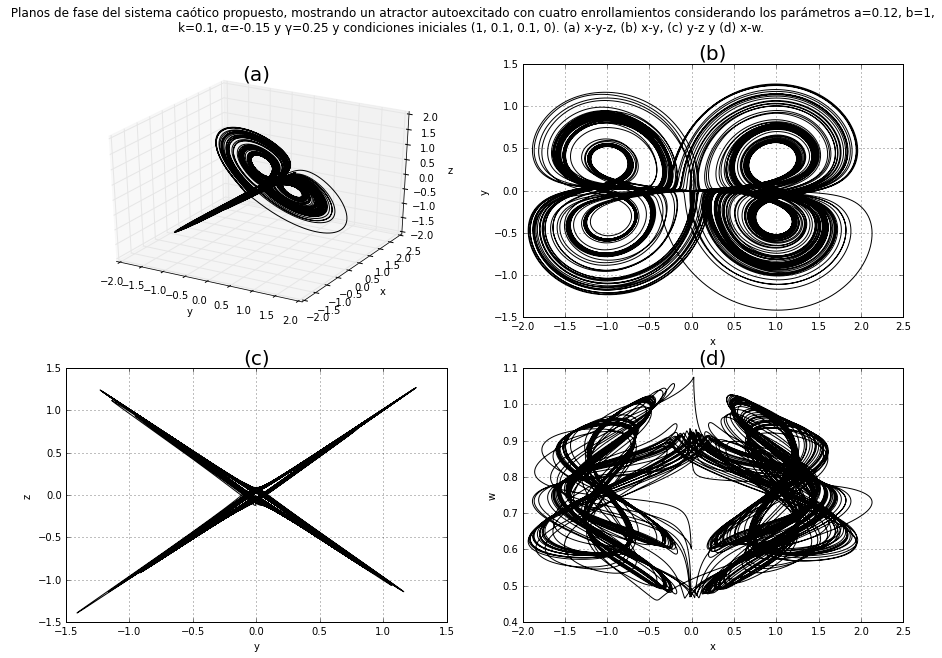

In [ ]:
fig = plt.figure(figsize=(15,10))
fig.suptitle("\n".join(wrap(' Planos de fase del sistema caótico propuesto, mostrando un atractor autoexcitado con cuatro enrollamientos considerando los parámetros a=0.12, b=1, k=0.1, α=-0.15 y γ=0.25 y condiciones iniciales (1, 0.1, 0.1, 0). (a) x-y-z, (b) x-y, (c) y-z y (d) x-w.',150)),fontsize=12)

ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot3D(-y,x,z,c='k')
ax.set_xlim([-2,2])
ax.set_zlim([-2,2])
ax.set_title('(a)',fontsize=20)
ax.set_xlabel('y')
ax.set_ylabel('x')
ax.set_zlabel('z')


ax = fig.add_subplot(2, 2, 2)
ax.plot(x,y,c='k')
ax.grid(True)
ax.set_title('(b)',fontsize=20)
ax.set_ylabel('y')
ax.set_xlabel('x')

ax = fig.add_subplot(2, 2, 3)
ax.plot(y,z,c='k')
ax.grid(True)
ax.set_title('(c)',fontsize=20)
ax.set_ylabel('z')
ax.set_xlabel('y')

ax = fig.add_subplot(2, 2, 4)
ax.plot(x,w,c='k')
ax.grid(True)
ax.set_title('(d)',fontsize=20)
ax.set_ylabel('w')
ax.set_xlabel('x')

plt.show()

## Diseño electrónico del sistema caótico de 4D

Con la finalidad de demostrar la viabilidad del sistema caótico propuesto,
en el articulo se diseño un circuito electrónico, el cual sintetiza el sistema caótico basado
en el memristor.

Aplicando las leyes de circuito de Kirchoff, la ecuacion del circuito
correspondiente al diseño propuesto, puede ser escrito de la siguiente manera:

\begin{equation}
 \dot{x}=\frac{1}{RC}(\frac{R}{Ra}x-\frac{R}{10VR1}yz),
\end{equation} 
\begin{equation}
 \dot{y}=\frac{1}{RC}(-\frac{R}{Rb}y+\frac{R}{10VR2}xz),
\end{equation} 
\begin{equation}
 \dot{z}=\frac{1}{RC}(z+\frac{R}{10VR3}xy+Va-\frac{R}{10VRg}w^{2}),
\end{equation} 
\begin{equation}
 \dot{w}=\frac{1}{RC}(\frac{R}{Rk})z,
\end{equation} 

Los componentes del circuito han sido seleccionados como:
- $R=10k\Omega$,
- $R1=R2=R3=R4=1kΩ$, 
- $Ra=83.3kΩ$, 
- $Rb=100kΩ$, 
- $Rk=100kΩ$, 
- $Rg=4kΩ$, 
- $C=10nF$,
- $Va=0.15V$

El diseño del circuito es simulado y
los resultados obtenidos son mostrados a continuación: 

In [ ]:
def circuito(t,xyzw,a,b,k,alp,gamm):
  x,y,z,w = xyzw
  RC=10000
  R = 1
  R2 = 0.1
  Va = 0.15
  return [(a*x)-(y*z),(-b*y)+(x*z),(-z)+(x*y)-(alp+(gamm*(w**2))),k*z]

Se definen condiciones iniciales y los parametros del sistema

In [ ]:
time = [500,6000]
t = np.arange(4000,6000,0.01)
init_condi = [1,0.1,0.1,0]
solucion = solve_ivp(circuito,time,init_condi,args=[0.12,0.1,0.1,0.15,2.5],t_eval=t)
t = solucion.t
x = solucion.y[0,:]
y = solucion.y[1,:]
z = solucion.y[2,:]
w = solucion.y[3,:]

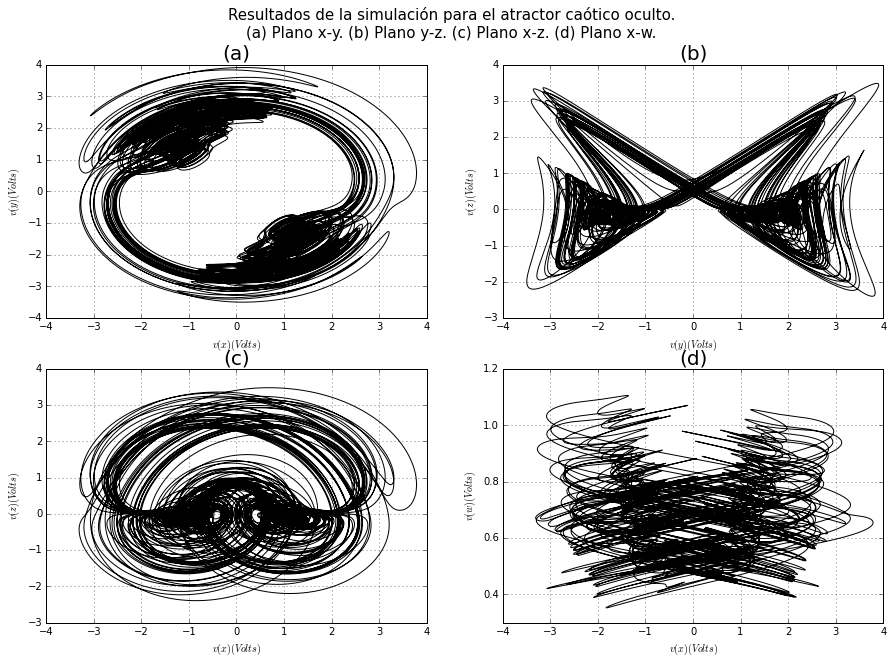

In [ ]:
fig = plt.figure(figsize=(15,10))
fig.suptitle("\n".join(wrap('Resultados de la simulación para el atractor caótico oculto. (a) Plano x-y. (b) Plano y-z. (c) Plano x-z. (d) Plano x-w.',60)),fontsize=15)




ax = fig.add_subplot(2, 2, 1)
ax.plot(-x,y,c='k')
ax.grid(True)
ax.set_title('(a)',fontsize=20)
ax.set_ylabel('$v(y)(Volts)$',fontsize=10)
ax.set_xlabel('$v(x)(Volts)$',fontsize=10)

ax = fig.add_subplot(2, 2, 2)
ax.plot(y,-z,c='k')
ax.grid(True)
ax.set_title('(b)',fontsize=20)
ax.set_ylabel('$v(z)(Volts)$',fontsize=10)
ax.set_xlabel('$v(y)(Volts)$',fontsize=10)

ax = fig.add_subplot(2, 2, 3)
ax.plot(-x,-z,c='k')
ax.grid(True)
ax.set_title('(c)',fontsize=20)
ax.set_ylabel('$v(z)(Volts)$',fontsize=10)
ax.set_xlabel('$v(x)(Volts)$',fontsize=10)

ax = fig.add_subplot(2, 2, 4)
ax.plot(-x,w,c='k')
ax.grid(True)
ax.set_title('(d)',fontsize=20)
ax.set_ylabel('$v(w)(Volts)$',fontsize=10)
ax.set_xlabel('$v(x)(Volts)$',fontsize=10)

plt.show()

Los resultados teóricos
mostrados en los primeros planos de fase son similares con los obtenidos del circuito.